# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape[0]

81937

In [4]:
df = df.head(n=3000)

In [5]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog. `Animal Name` is the dog's name, `Vaccinated` is wether the dog is vaccinated.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

1. What are the top 10 dominant colors?
2. What is the percentage of vaccinated dogs per zip code area?
3. What is the age distribution?
4. What primary Breeds are spayed/neutered the most

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

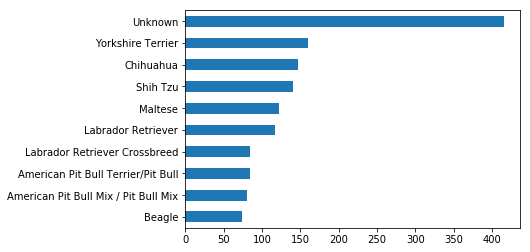

In [6]:
df['Primary Breed'].value_counts(ascending=True).tail(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

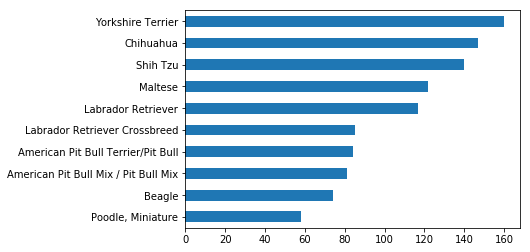

In [7]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts(ascending=True).tail(10).plot(kind='barh')


## What are the most popular dog names?

In [8]:
dogs_name = df[(df['Animal Name'] != 'Unknown' )& (df['Animal Name'] != 'UNKNOWN')]['Animal Name'].value_counts()
dogs_name.index[:5]
print(", ".join(dogs_name.index[:5]) , "are the 5 most popular dog names.")
# ", ".join(["A","B","C","D"])

Bella, Max, Lola, Charlie, Lily are the 5 most popular dog names.


## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
df[df['Animal Name'] == 'Chung'].shape[0]

0

In [10]:
df[df['Animal Name'] == 'Max'].shape[0]

19

In [11]:
df[df['Animal Name'] == 'Maxwell'].shape[0]

1

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [12]:
#total = df['Guard or Trained'].value_counts().head()[0] + df['Guard or Trained'].value_counts().head()[1]
#print( (df['Guard or Trained'].value_counts().head()[1]/total)*100, "%")
df['Guard or Trained'].value_counts(normalize=True)*100

No     99.824766
Yes     0.175234
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [13]:
df['Guard or Trained'].value_counts()

No     1709
Yes       3
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [14]:
df['Guard or Trained'].value_counts(dropna=False)

No     1709
NaN    1288
Yes       3
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [15]:
new_df = df.copy()
new_df['Guard or Trained'].fillna('No', inplace=True)


In [16]:
new_df['Guard or Trained'].value_counts(dropna=False)


No     2997
Yes       3
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [17]:
df[(df['Guard or Trained'] == 'Yes') & (df['Primary Breed'] != 'Unknown')]['Primary Breed'].value_counts()


Poodle, Standard    1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [18]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [19]:
df['age'] = 2017 - df['year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3


In [20]:
print( round(df['age'].mean(), 2) )


7.33


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [21]:
df_zip = pd.read_csv("zipcodes-neighborhoods.csv")
#  df = df.merge?


In [22]:
df = df.merge(df_zip, how='left', left_on='Owner Zip Code', right_on='zip')
df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [23]:
df[(df['borough'] == 'Bronx') & (~df['Animal Name'].isin(['Unknown', 'UNKNOWN', 'NO NAME']))]['Animal Name'].value_counts().head()

Bella      4
Luna       3
Rosie      2
Tyson      2
Pebbles    2
Name: Animal Name, dtype: int64

In [24]:
df[(df['borough'] == 'Brooklyn') & (~df['Animal Name'].isin(['Unknown', 'UNKNOWN', 'NO NAME']))]['Animal Name'].value_counts().head()

Bella      7
Charlie    5
Lucy       5
Lola       5
Coco       4
Name: Animal Name, dtype: int64

In [25]:
df[(df['borough'] == 'Upper East Side') & (~df['Animal Name'].isin(['Unknown', 'UNKNOWN', 'NO NAME']))]['Animal Name'].value_counts().head()

Series([], Name: Animal Name, dtype: int64)

## What is the most common dog breed in each of the neighborhoods of NYC?

In [26]:
# df.groupby('neighborhood')[ (['Animal Name'] != 'Unknown') & (df['Animal Name'] != 'UNKNOWN') & (df['Animal Name'] != 'NO NAME')]['Animal Name'].value_counts().head()
# df.groupby('neighborhood')['Animal Name'].value_counts().head(10)
df[(df['Primary Breed'] != 'Unknown') & (~df['Animal Name'].isin(['Unknown', 'UNKNOWN', 'NO NAME']))].groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                       
Borough Park                   Maltese                                  4
Bronx Park and Fordham         American Pit Bull Terrier/Pit Bull       3
Bushwick and Williamsburg      American Pit Bull Mix / Pit Bull Mix     4
Canarsie and Flatlands         Yorkshire Terrier                        4
Central Bronx                  Shih Tzu                                 3
Central Brooklyn               American Pit Bull Mix / Pit Bull Mix     4
Central Harlem                 American Pit Bull Terrier/Pit Bull       4
Central Queens                 Labrador Retriever Crossbreed            3
Chelsea and Clinton            Chihuahua                               10
East Harlem                    American Pit Bull Mix / Pit Bull Mix     5
East New York and New Lots     American Pit Bull Terrier/Pit Bull       4
Flatbush                       Labrador Retriever                       3
Gramercy Park and Murray Hill  Labrador Retr

## What breed of dogs are the least likely to be spayed? Male or female?

In [27]:
known_breeds = df[~df['Primary Breed'].isin(['Unknown', 'UNKNOWN', 'NO NAME'])]
breed_fractions = known_breeds.groupby(['Primary Breed'])['Spayed or Neut'].value_counts(normalize=True)
breed_least_likely = breed_fractions[slice(None), "Yes"].sort_values().index[0]
# https://stackoverflow.com/questions/10175068/select-data-at-a-particular-level-from-a-multiindex
print("The breed of dog that is least (likely to be) spayed is the", breed_least_likely)


The breed of dog that is least (likely to be) spayed is the Cane Corso


In [28]:
# known_breeds_male = df[( df['Animal Gender'] == 'M' ) & (~df['Primary Breed'].isin(['Unknown', 'UNKNOWN', 'NO NAME'])) ]
known_breeds_male = known_breeds[ known_breeds['Animal Gender'] == 'M' ]
breed_fractions = known_breeds_male.groupby(['Primary Breed'])['Spayed or Neut'].value_counts(normalize=True)
breed_least_likely = breed_fractions[slice(None), "Yes"].sort_values().index[0]
print("The breed of male dog that is least (likely to be) spayed is the", breed_least_likely)


The breed of male dog that is least (likely to be) spayed is the Pekingese


In [29]:
# known_breeds_female = df[( df['Animal Gender'] == 'F' ) & (~df['Primary Breed'].isin(['Unknown', 'UNKNOWN', 'NO NAME'])) ]
known_breeds_female = known_breeds[ known_breeds['Animal Gender'] == 'F' ]
breed_fractions = known_breeds_female.groupby(['Primary Breed'])['Spayed or Neut'].value_counts(normalize=True)
breed_least_likely = breed_fractions[slice(None), "Yes"].sort_values().index[0]
print("The breed of female dog that is least (likely to be) spayed is the", breed_least_likely)


The breed of female dog that is least (likely to be) spayed is the Cane Corso


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [30]:
df['Animal Dominant Color'].unique()

array(['BROWN', 'BLACK', 'Rust', 'BLOND', 'Black', 'Charcoal', 'White',
       'TAN', 'RED', 'WHITE', 'Apricot', 'Brown', 'BRINDLE', 'Cream',
       'Gray', 'Brindle', 'APRICOT', 'GOLD', 'Red', 'Tan', 'BLUE', 'GRAY',
       'Gold', 'BLUE MERLE', 'CHOCOLATE', 'Blond', 'Chocolate', 'Silver',
       'Blue', 'ORANGE', 'Fawn', 'FAWN', 'Blue Merle', 'RUST', nan,
       'CHARCOAL', 'CREAM', 'Orange', 'SILVER'], dtype=object)

In [31]:
monochrome_color = ['Black', 'BLACK', 'White', 'WHITE', 'Gray', 'GRAY', 'Grey', 'GREY']
df['monochrome'] = ( df['Animal Dominant Color'].isin(monochrome_color) & (df['Animal Secondary Color'].isnull()) & (df['Animal Third Color'].isnull() ) )
df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,monochrome
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024.0,Manhattan,False
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4,Southeast Bronx,10461.0,Bronx,False
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan,False
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9,Upper West Side,10025.0,Manhattan,False
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan,True


In [32]:
monochrome_dogs = df['monochrome'].value_counts()[True]
print("There are", monochrome_dogs,"monochrome dogs.")


There are 346 monochrome dogs.


## How many dogs are in each borough? Plot it in a graph.

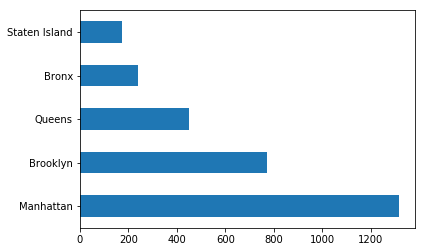

In [33]:
df['borough'].value_counts().plot(kind='barh')


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [34]:
df_borough_dogs_number = df['borough'].value_counts()
# print(df_borough_dogs_number)
BDN_sorted = df_borough_dogs_number.sort_index()
BDN_sorted

Bronx             240
Brooklyn          773
Manhattan        1316
Queens            452
Staten Island     173
Name: borough, dtype: int64

In [35]:
df_boro_population = pd.read_csv("boro_population.csv")
df_boro_population = df_boro_population.set_index('borough').sort_index()['population']
del df_boro_population.index.name
df_boro_population

Bronx            1455444
Brooklyn         2636735
Manhattan        1644518
Queens           2339150
Staten Island     474558
Name: population, dtype: int64

In [36]:
per_capita = BDN_sorted/df_boro_population
# type(per_capita)
per_capita_sorted = per_capita.sort_values(axis=0, ascending=False, inplace=False, kind='mergesort', na_position='first')
per_capita_sorted

Manhattan        0.000800
Staten Island    0.000365
Brooklyn         0.000293
Queens           0.000193
Bronx            0.000165
dtype: float64

In [37]:
print("The borough with the highest number of dogs per-capita is", per_capita_sorted.index[0])
 

The borough with the highest number of dogs per-capita is Manhattan


#### same thing with merging

In [38]:
df_boro_population = pd.read_csv("boro_population.csv")
df_boro_population_merged = df.merge(df_boro_population, on="borough")
# df.merge(pd.DataFrame(data = [s.values] * len(s), columns = s.index), left_index=True, right_index=True)
df_boro_population_merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,monochrome,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2015-09-19,2016-09-19,2007,10,Upper West Side,10024.0,Manhattan,False,1644518,23
1,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan,False,1644518,23
2,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,2014-09-12,2017-10-20,2008,9,Upper West Side,10025.0,Manhattan,False,1644518,23
3,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,2014-09-12,2019-09-12,2014,3,Greenwich Village and Soho,10013.0,Manhattan,True,1644518,23
4,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,...,2014-09-12,2017-09-12,2013,4,Greenwich Village and Soho,10013.0,Manhattan,False,1644518,23
5,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,...,2014-09-12,2017-09-12,2014,3,East Harlem,10035.0,Manhattan,False,1644518,23
6,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,...,2014-09-12,2019-10-01,2012,5,Greenwich Village and Soho,10013.0,Manhattan,False,1644518,23
7,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,...,2014-09-12,2019-10-30,2006,11,Greenwich Village and Soho,10013.0,Manhattan,False,1644518,23
8,10028,Lola,F,Maltese,NaN,Apricot,White,NaN,2009-06-01,Yes,...,2014-09-12,2017-10-09,2009,8,Upper East Side,10028.0,Manhattan,False,1644518,23
9,10022,Elizabeth,F,Cavalier King Charles Spaniel,NaN,Brown,White,NaN,2013-03-01,Yes,...,2014-09-13,2019-09-13,2013,4,Gramercy Park and Murray Hill,10022.0,Manhattan,False,1644518,23


In [39]:
population_mean = df_boro_population_merged.groupby('borough')['population'].mean()
population_mean

borough
Bronx            1455444
Brooklyn         2636735
Manhattan        1644518
Queens           2339150
Staten Island     474558
Name: population, dtype: int64

In [40]:
per_capita = BDN_sorted/population_mean
# type(per_capita)
per_capita_sorted = per_capita.sort_values(axis=0, ascending=False, inplace=False, kind='mergesort', na_position='first')
per_capita_sorted

Manhattan        0.000800
Staten Island    0.000365
Brooklyn         0.000293
Queens           0.000193
Bronx            0.000165
dtype: float64

In [41]:
print("The borough with the highest number of dogs per-capita is", per_capita_sorted.index[0])
 

The borough with the highest number of dogs per-capita is Manhattan


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

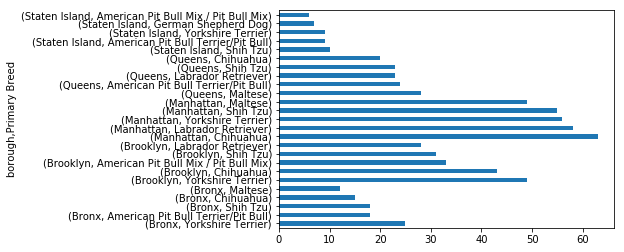

In [42]:
# df[(df['Primary Breed'] != 'Unknown') & (df['Primary Breed'] != 'UNKNOWN') & (df['Primary Breed'] != 'unknown') & (df['Primary Breed'] != 'NO NAME')].groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind='barh')
df[(~df['Primary Breed'].isin(['Unknown', 'UNKNOWN', 'unknown','NO NAME']))].groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind='barh')


## What percentage of dogs are not guard dogs?

In [43]:
# not_percentage = df['Guard or Trained'].value_counts(normalize=True)[0]
not_percentage = df['Guard or Trained'].value_counts(normalize=True)['No']
print("The percentage of dogs are not guard dogs is", round(not_percentage, 6)*100 ,"%" )


The percentage of dogs are not guard dogs is 99.8248 %
